In [49]:
import numpy as np


from plot_utils import *


# Euler-Maruyama

In [50]:
def brownian_noise(m):
    return np.random.randn(m)

def euler_maruyama_sde_01(x, t, δt):
    m = x.shape[1]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    dUt = brownian_noise(m)
    dVt = brownian_noise(m)
    dWt = brownian_noise(m)

    dXt = δt * 10*(Yt - Xt)          + np.sqrt(δt) * dUt
    dYt = δt * (Xt * (28 - Zt) - Yt) + np.sqrt(δt) * dVt
    dZt = δt * (Xt * Yt - 8/3 * Zt)  + np.sqrt(δt) * dWt
    return np.array([Xt+dXt, Yt+dYt, Zt+dZt])

def simulate_em_sde01(tmax, δt, m=3):
    t = np.arange(0, tmax, δt)

    x0            = np.array([[-5.91652, -5.52332, 24.57231]]).T * np.ones((1, m))
    xsim          = np.full((3, m, len(t)), np.nan)
    xsim[:, :, 0] = x0

    for i, ti in enumerate(t[1:]):
        xsim[:, :, i+1] = euler_maruyama_sde_01(xsim[:,:,i], ti, ti-t[i])

    return t, xsim

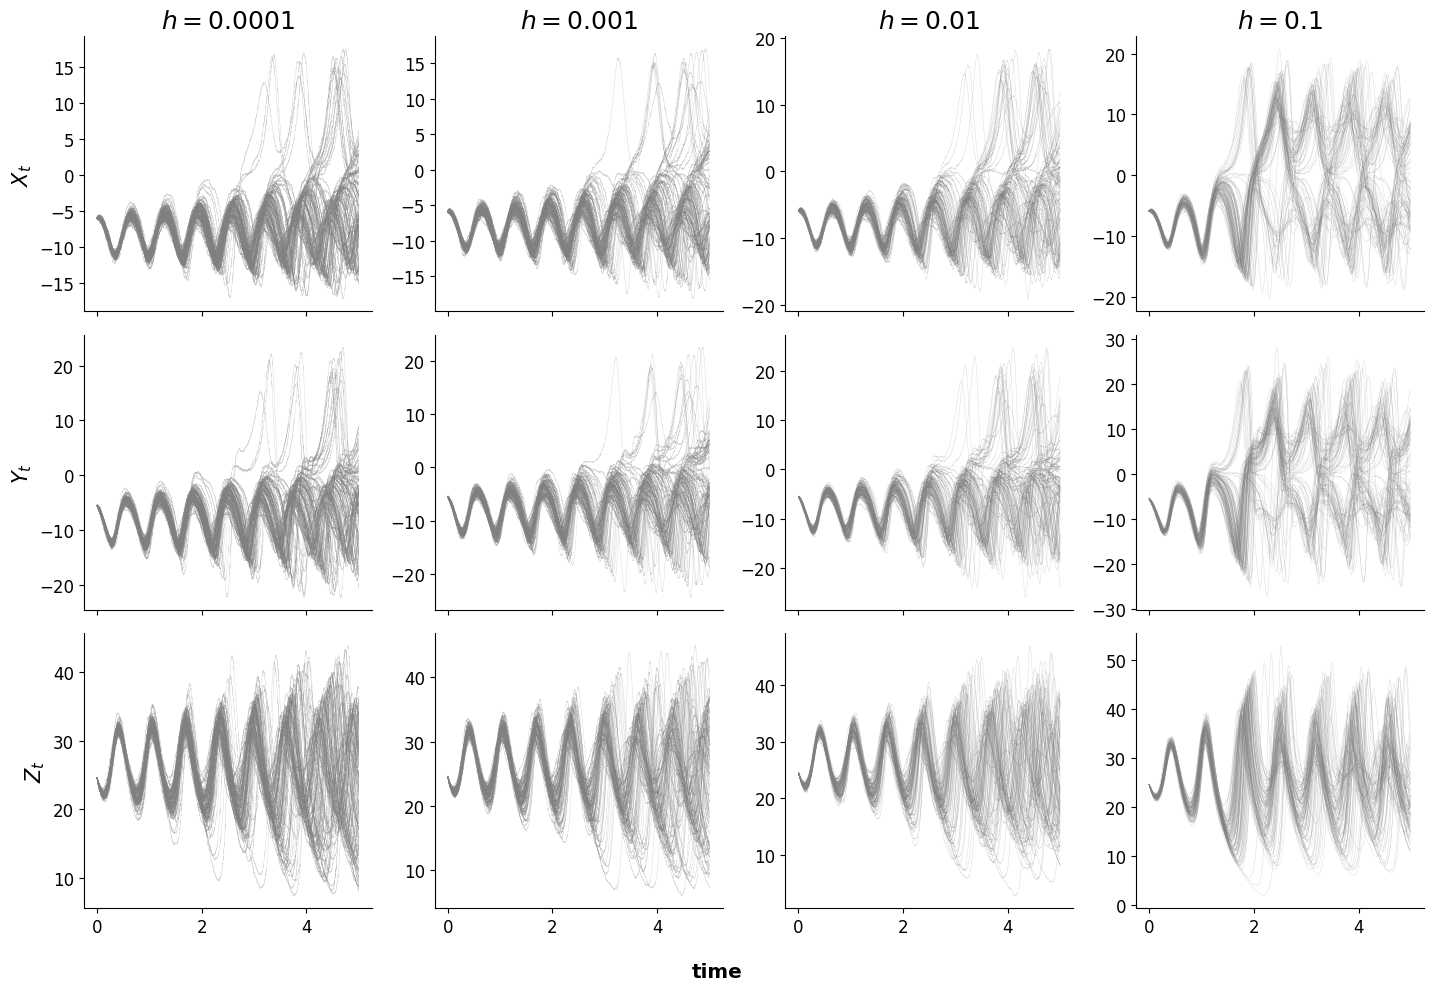

In [51]:
tmax     = 5
num_sims = 100

t1, xsim1 = simulate_em_sde01(tmax, 0.00001, m=num_sims)
t2, xsim2 = simulate_em_sde01(tmax, 0.0001,  m=num_sims)
t3, xsim3 = simulate_em_sde01(tmax, 0.001,   m=num_sims)
t4, xsim4 = simulate_em_sde01(tmax, 0.01,    m=num_sims)

fig, ax = plt.subplots(3, 4, figsize=(14.5, 10), sharex=True)
ax[0, 0].plot(t1, xsim1[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 0].plot(t1, xsim1[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 0].plot(t1, xsim1[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 1].plot(t2, xsim2[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 1].plot(t2, xsim2[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 1].plot(t2, xsim2[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 2].plot(t3, xsim3[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 2].plot(t3, xsim3[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 2].plot(t3, xsim3[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 3].plot(t4, xsim4[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 3].plot(t4, xsim4[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 3].plot(t4, xsim4[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 0].set_ylabel(r'$X_t$')
ax[1, 0].set_ylabel(r'$Y_t$')
ax[2, 0].set_ylabel(r'$Z_t$')

for i, h in enumerate([0.0001, 0.001, 0.01, 0.1]):
    ax[0, i].set_title(f'$h = {h}$')

# despine
for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

fig.supxlabel('time', weight='bold')
plt.tight_layout()

In [52]:
def xi_second_scheme(δt, m):
    xis   = [np.sqrt(3*δt), -np.sqrt(3*δt), 0]
    probs = [1/6, 1/6, 2/3]
    return np.random.choice(xis, size=m, p=probs)

#def euler_maruyama_sde_01(x, t, δt):
def second_scheme_sde_01(x, t, δt):
    m = x.shape[1]

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    dUt = brownian_noise(m)
    dVt = brownian_noise(m)
    dWt = brownian_noise(m)

    f = 10 * (Yt - Xt)
    g = Xt * (28 - Zt) - Yt
    h = Xt * Yt - 8/3 * Zt

    fx  = -10
    fxx = 0

    gy  = 0
    gyy = 0

    hz  = -8/3
    hzz = 0

    xi = xi_second_scheme(δt, m)
    xi_y = xi_second_scheme(δt, m)
    xi_z = xi_second_scheme(δt, m)

    dXt = δt*f + xi*dUt + 0.5*δt*xi*(fx*dUt) + 0.5*δt**2*(f*fx + 0.5*fxx*dUt**2 )
    dYt = δt*g + xi*dVt + 0.5*δt*xi*(gy*dVt) + 0.5*δt**2*(g*gy + 0.5*gyy*dVt**2 )
    dZt = δt*h + xi*dWt + 0.5*δt*xi*(hz*dWt) + 0.5*δt**2*(h*hz + 0.5*hzz*dWt**2 )

    return np.array([Xt+dXt, Yt+dYt, Zt+dZt])

def simulate_second_scheme_sde01(tmax, δt, m=3):
    t = np.arange(0, tmax, δt)

    x0            = np.array([[-5.91652, -5.52332, 24.57231]]).T * np.ones((1, m))
    xsim          = np.full((3, m, len(t)), np.nan)
    xsim[:, :, 0] = x0

    for i, ti in enumerate(t[1:]):
        xsim[:, :, i+1] = second_scheme_sde_01(xsim[:,:,i], ti, ti-t[i])

    return t, xsim


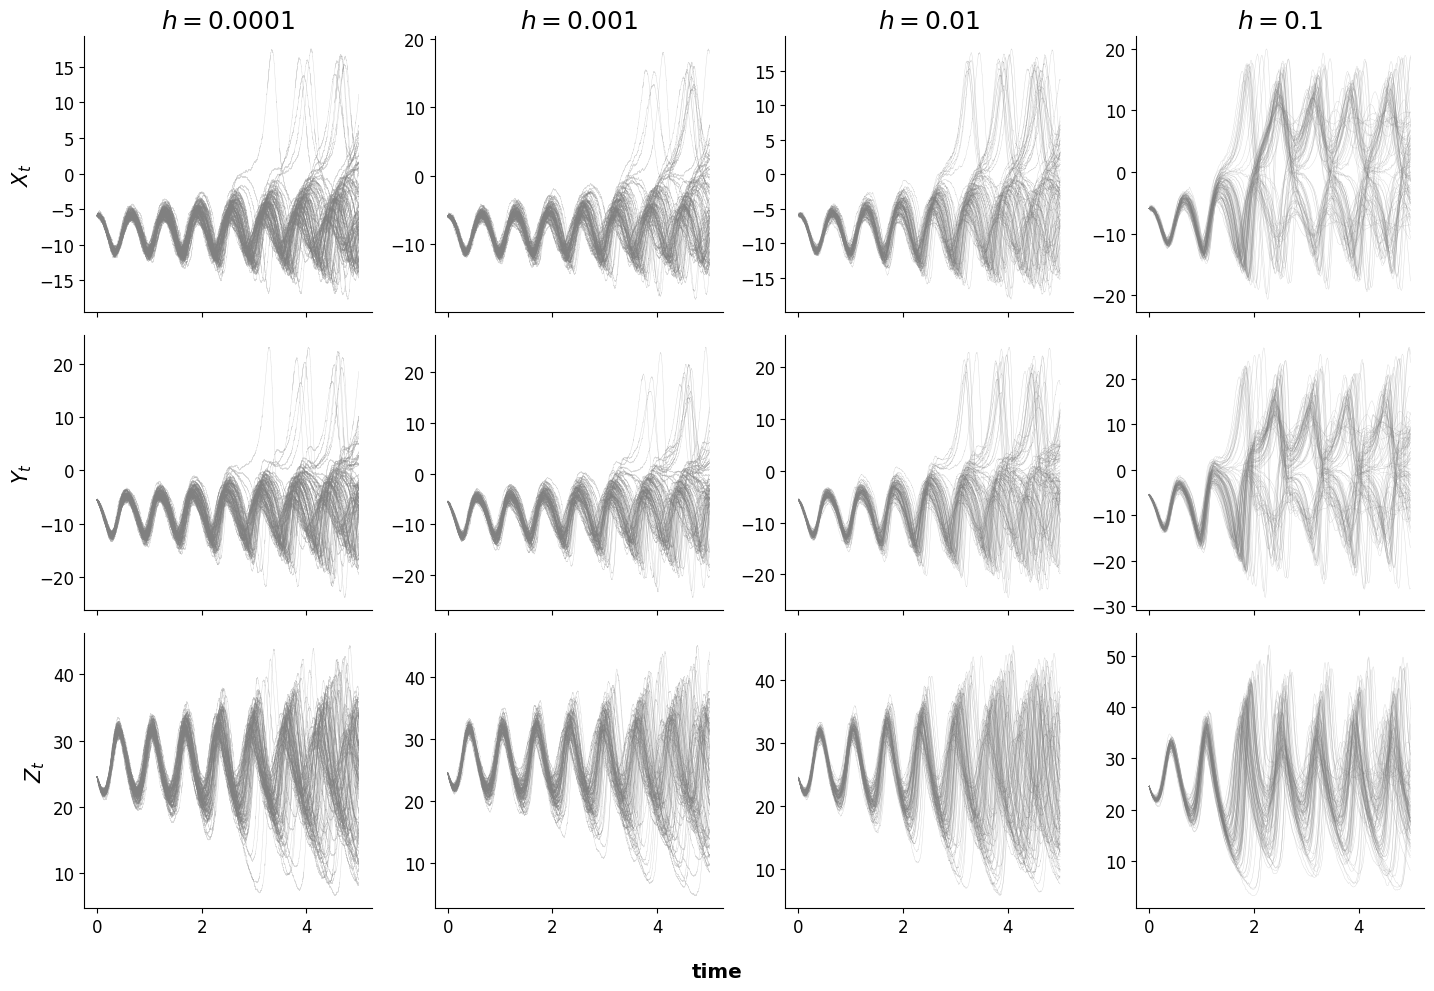

In [53]:
tmax     = 5
num_sims = 100


t1, xsim1 = simulate_second_scheme_sde01(tmax, 0.00001, m=num_sims)
t2, xsim2 = simulate_second_scheme_sde01(tmax, 0.0001,  m=num_sims)
t3, xsim3 = simulate_second_scheme_sde01(tmax, 0.001,   m=num_sims)
t4, xsim4 = simulate_second_scheme_sde01(tmax, 0.01,    m=num_sims)

fig, ax = plt.subplots(3, 4, figsize=(14.5, 10), sharex=True)
ax[0, 0].plot(t1, xsim1[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 0].plot(t1, xsim1[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 0].plot(t1, xsim1[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 1].plot(t2, xsim2[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 1].plot(t2, xsim2[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 1].plot(t2, xsim2[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 2].plot(t3, xsim3[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 2].plot(t3, xsim3[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 2].plot(t3, xsim3[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 3].plot(t4, xsim4[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 3].plot(t4, xsim4[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 3].plot(t4, xsim4[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 0].set_ylabel(r'$X_t$')
ax[1, 0].set_ylabel(r'$Y_t$')
ax[2, 0].set_ylabel(r'$Z_t$')

for i, h in enumerate([0.0001, 0.001, 0.01, 0.1]):
    ax[0, i].set_title(f'$h = {h}$')

# despine
for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

fig.supxlabel('time', weight='bold')
plt.tight_layout()

In [54]:
def rk_book(x, t, δt):
    m = x.shape[1]
    n = x.shape[0]


    dUt = brownian_noise(m)
    dVt = brownian_noise(m)
    dWt = brownian_noise(m)

    Xt = x[0, :]
    Yt = x[1, :]
    Zt = x[2, :]

    bx1 = 10 * (Yt - Xt)
    bx2 = Xt * (28 - Zt) - Yt
    bx3 = Xt * Yt - 8/3 * Zt

    #print(Xt.shape, bx1.shape, dUt.shape)

    y1 = Xt + δt*bx1 + np.sqrt(δt) * dUt #10 * (Yx[1, :] - Yx[0, :])
    y2 = Yt + δt*bx2 + np.sqrt(δt) * dVt #Yx[0, :] * (28 - Yx[2, :]) - Yx[1, :]
    y3 = Zt + δt*bx3 + np.sqrt(δt) * dWt #Yx[0, :] * Yx[1, :] - 8/3 * Yx[2, :]

    by1 = 10 * (y2 - y1)
    by2 = y1 * (28 - y3) - y2
    by3 = y1 * y2 - 8/3 * y3

    dx = 1/2 * δt * (bx1 + by1) + np.sqrt(δt)*dUt
    dy = 1/2 * δt * (bx2 + by2) + np.sqrt(δt)*dVt
    dz = 1/2 * δt * (bx3 + by3) + np.sqrt(δt)*dWt

    return np.array([Xt+dx, Yt+dy, Zt+dz])


def simulate_third_scheme_sde01(tmax, δt, m=3):
    t = np.arange(0, tmax, δt)

    x0            = np.array([[-5.91652, -5.52332, 24.57231]]).T * np.ones((1, m))
    xsim          = np.full((3, m, len(t)), np.nan)
    xsim[:, :, 0] = x0

    for i, ti in enumerate(t[1:]):
        xsim[:, :, i+1] = rk_book(xsim[:,:,i], ti, ti-t[i])

    return t, xsim

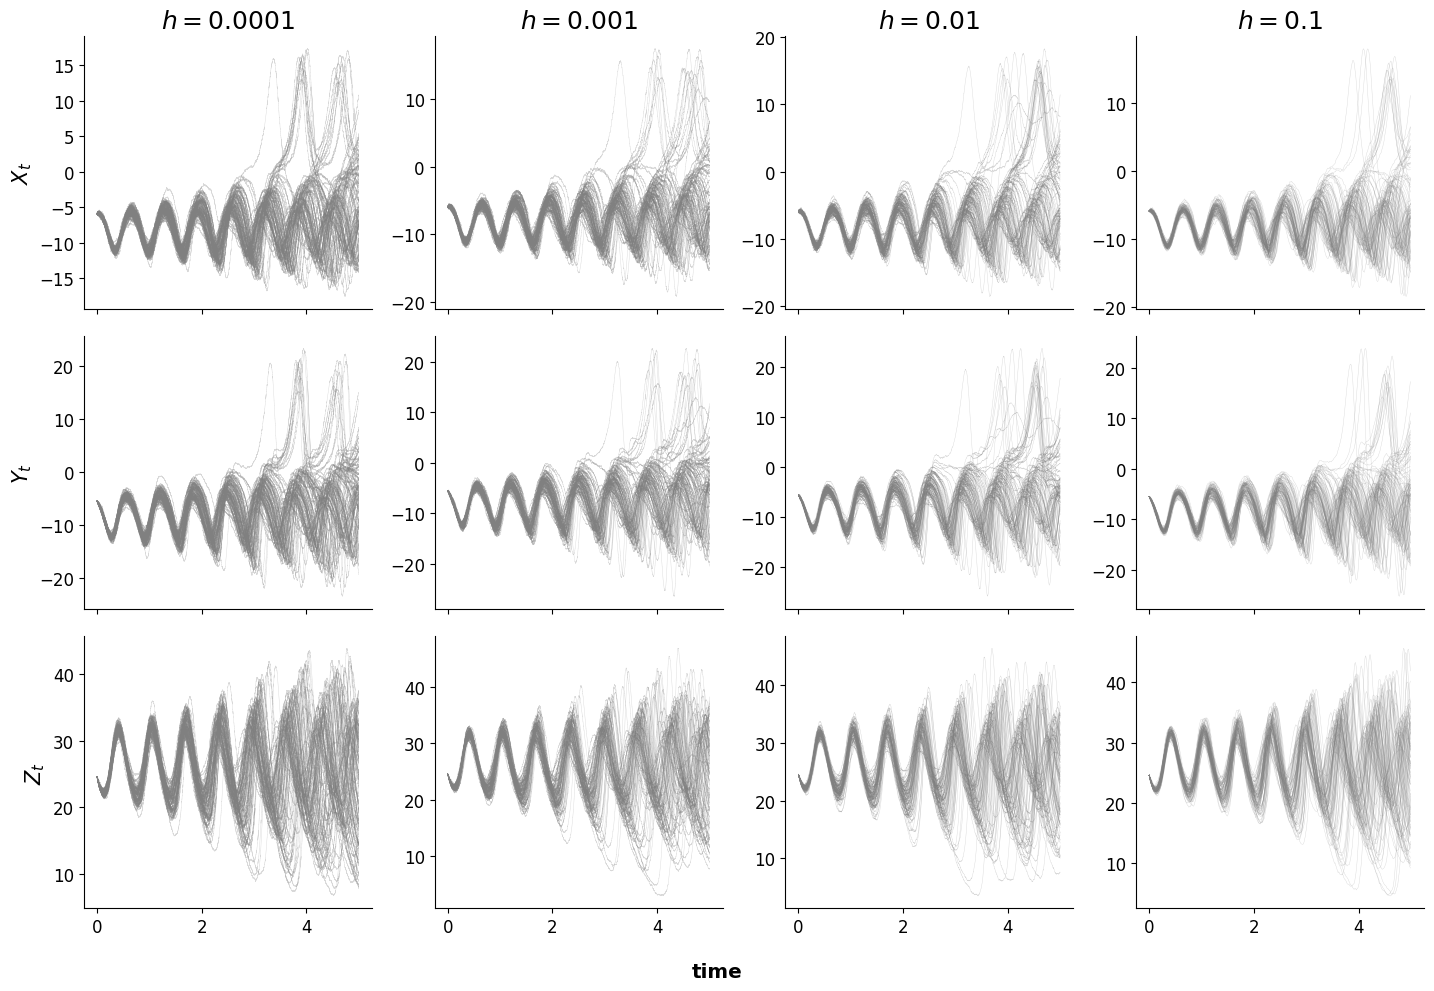

In [55]:
tmax     = 5
num_sims = 100

t1, xsim1 = simulate_third_scheme_sde01(tmax, 0.00001, m=num_sims)
t2, xsim2 = simulate_third_scheme_sde01(tmax, 0.0001,  m=num_sims)
t3, xsim3 = simulate_third_scheme_sde01(tmax, 0.001,   m=num_sims)
t4, xsim4 = simulate_third_scheme_sde01(tmax, 0.01,    m=num_sims)

fig, ax = plt.subplots(3, 4, figsize=(14.5, 10), sharex=True)
ax[0, 0].plot(t1, xsim1[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 0].plot(t1, xsim1[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 0].plot(t1, xsim1[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 1].plot(t2, xsim2[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 1].plot(t2, xsim2[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 1].plot(t2, xsim2[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 2].plot(t3, xsim3[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 2].plot(t3, xsim3[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 2].plot(t3, xsim3[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 3].plot(t4, xsim4[0, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[1, 3].plot(t4, xsim4[1, :, :].T, alpha=0.3, color="gray", lw=0.3)
ax[2, 3].plot(t4, xsim4[2, :, :].T, alpha=0.3, color="gray", lw=0.3)

ax[0, 0].set_ylabel(r'$X_t$')
ax[1, 0].set_ylabel(r'$Y_t$')
ax[2, 0].set_ylabel(r'$Z_t$')

for i, h in enumerate([0.0001, 0.001, 0.01, 0.1]):
    ax[0, i].set_title(f'$h = {h}$')

# despine
for axi in ax.flatten():
    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)

fig.supxlabel('time', weight='bold')
plt.tight_layout()